In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train_path = '/kaggle/input/house-prices-advanced-regression-techniques/train.csv'
train_data = pd.read_csv(train_path)

train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# **Descriptive Analysis**

Analysis 11-20

In [3]:
bsmt_features = ['TotalBsmtSF', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath']
bsmtda = train_data[bsmt_features].describe()

first_second_floor_features = ['1stFlrSF', '2ndFlrSF']
first_second_floorda = train_data[first_second_floor_features].describe()

mas_features = ['MasVnrArea', 'MasVnrType']
masda = train_data[['MasVnrArea']].describe()
mas_type_counts = train_data['MasVnrType'].value_counts(dropna=False)

kitchen_quality_price = train_data.groupby('KitchenQual')['SalePrice'].mean()

fireplace_features = ['Fireplaces', 'FireplaceQu']
fireplaceda = train_data[fireplace_features].describe()
fireplace_quality_counts = train_data['FireplaceQu'].value_counts(dropna=False)

pool_features = ['PoolArea', 'PoolQC']
poolda = train_data[pool_features].describe()
pool_quality_counts = train_data['PoolQC'].value_counts(dropna=False)

paved_drive_impact = train_data.groupby('PavedDrive')['SalePrice'].mean()

electrical_counts = train_data['Electrical'].value_counts(dropna=False)
electrical_missing = train_data['Electrical'].isnull().sum()

train_data['PropertyAge'] = train_data['YrSold'] - train_data['YearBuilt']
age_price_correlation = train_data[['PropertyAge', 'SalePrice']].corr().iloc[0, 1]

neighborhood_priceda = train_data.groupby('Neighborhood')['SalePrice'].mean().sort_values()

eda_1 = {
    '11. Basement Features Overview': bsmtda,
    '12. First and Second Floor Area Analysis': first_second_floorda,
    '13. Masonry Veneer Summary': masda,
    '13. Masonry Veneer Type Counts': mas_type_counts,
    '14. Kitchen Quality and SalePrice Relationship': kitchen_quality_price,
    '15. Fireplaces Count Summary': fireplaceda,
    '15. Fireplace Quality Counts': fireplace_quality_counts,
    '16. Pool Area and Pool Quality Overview': poolda,
    '16. Pool Quality Counts': pool_quality_counts,
    '17. Paved Driveway Impact': paved_drive_impact,
    '18. Electrical Counts': electrical_counts,
    '18. Electrical Missing Values': electrical_missing,
    '19. Property Age and SalePrice Correlation': age_price_correlation,
    '20. Neighborhood-wise SalePrice Summary': neighborhood_priceda
}

eda_1

{'11. Basement Features Overview':        TotalBsmtSF   BsmtFinSF1   BsmtFinSF2    BsmtUnfSF  BsmtFullBath  \
 count  1460.000000  1460.000000  1460.000000  1460.000000   1460.000000   
 mean   1057.429452   443.639726    46.549315   567.240411      0.425342   
 std     438.705324   456.098091   161.319273   441.866955      0.518911   
 min       0.000000     0.000000     0.000000     0.000000      0.000000   
 25%     795.750000     0.000000     0.000000   223.000000      0.000000   
 50%     991.500000   383.500000     0.000000   477.500000      0.000000   
 75%    1298.250000   712.250000     0.000000   808.000000      1.000000   
 max    6110.000000  5644.000000  1474.000000  2336.000000      3.000000   
 
        BsmtHalfBath  
 count   1460.000000  
 mean       0.057534  
 std        0.238753  
 min        0.000000  
 25%        0.000000  
 50%        0.000000  
 75%        0.000000  
 max        2.000000  ,
 '12. First and Second Floor Area Analysis':           1stFlrSF     2ndF

Analysis 21-30

In [4]:
lot_shape_price = train_data.groupby('LotShape')['SalePrice'].mean()

street_type_price = train_data.groupby('Street')['SalePrice'].mean()

house_style_price = train_data.groupby('HouseStyle')['SalePrice'].mean()

building_type_price = train_data.groupby('BldgType')['SalePrice'].mean()

foundation_type_price = train_data.groupby('Foundation')['SalePrice'].mean()

exterior_cond_price = train_data.groupby('ExterCond')['SalePrice'].mean()

heating_type_price = train_data.groupby('Heating')['SalePrice'].mean()

central_air_price = train_data.groupby('CentralAir')['SalePrice'].mean()

roof_style_price = train_data.groupby('RoofStyle')['SalePrice'].mean()

sale_type_price = train_data.groupby('SaleType')['SalePrice'].mean()
sale_condition_price = train_data.groupby('SaleCondition')['SalePrice'].mean()

eda_2 = {
    '21. Lot Shape and SalePrice Impact': lot_shape_price,
    '22. Street Type and SalePrice': street_type_price,
    '23. House Style and SalePrice': house_style_price,
    '24. Building Type and SalePrice': building_type_price,
    '25. Foundation Type and SalePrice': foundation_type_price,
    '26. Exterior Condition and SalePrice': exterior_cond_price,
    '27. Heating System Type and SalePrice': heating_type_price,
    '28. Central Air Presence and SalePrice': central_air_price,
    '29. Roof Style and SalePrice': roof_style_price,
    '30. Sale Type and Condition': {
        'SaleType': sale_type_price,
        'SaleCondition': sale_condition_price
    }
}

eda_2

{'21. Lot Shape and SalePrice Impact': LotShape
 IR1    206101.665289
 IR2    239833.365854
 IR3    216036.500000
 Reg    164754.818378
 Name: SalePrice, dtype: float64,
 '22. Street Type and SalePrice': Street
 Grvl    130190.500000
 Pave    181130.538514
 Name: SalePrice, dtype: float64,
 '23. House Style and SalePrice': HouseStyle
 1.5Fin    143116.740260
 1.5Unf    110150.000000
 1Story    175985.477961
 2.5Fin    220000.000000
 2.5Unf    157354.545455
 2Story    210051.764045
 SFoyer    135074.486486
 SLvl      166703.384615
 Name: SalePrice, dtype: float64,
 '24. Building Type and SalePrice': BldgType
 1Fam      185763.807377
 2fmCon    128432.258065
 Duplex    133541.076923
 Twnhs     135911.627907
 TwnhsE    181959.342105
 Name: SalePrice, dtype: float64,
 '25. Foundation Type and SalePrice': Foundation
 BrkTil    132291.075342
 CBlock    149805.714511
 PConc     225230.442040
 Slab      107365.625000
 Stone     165959.166667
 Wood      185666.666667
 Name: SalePrice, dtype: fl

Analysis 31-40

In [5]:

overall_qual_price = train_data.groupby('OverallQual')['SalePrice'].mean()

overall_cond_price = train_data.groupby('OverallCond')['SalePrice'].mean()

garage_type_price = train_data.groupby('GarageType')['SalePrice'].mean()

garage_finish_price = train_data.groupby('GarageFinish')['SalePrice'].mean()

garage_year_correlation = train_data[['GarageYrBlt', 'SalePrice']].corr().iloc[0, 1]

fence_quality_price = train_data.groupby('Fence')['SalePrice'].mean()

alley_type_price = train_data.groupby('Alley')['SalePrice'].mean()

roof_material_price = train_data.groupby('RoofMatl')['SalePrice'].mean()

gr_liv_area_stats = train_data['GrLivArea'].describe()

train_data['TotalBath'] = train_data['FullBath'] + 0.5 * train_data['HalfBath']
total_bath_price = train_data.groupby('TotalBath')['SalePrice'].mean()

eda_3 = {
    '31. Overall Quality and SalePrice': overall_qual_price,
    '32. Overall Condition and SalePrice': overall_cond_price,
    '33. Garage Type and SalePrice': garage_type_price,
    '34. Garage Finish Level and SalePrice': garage_finish_price,
    '35. Garage Year Built and SalePrice Correlation': garage_year_correlation,
    '36. Fence Quality and SalePrice': fence_quality_price,
    '37. Alley Type and SalePrice': alley_type_price,
    '38. Roof Material and SalePrice': roof_material_price,
    '39. Kitchen Above Ground Area (GrLivArea) Stats': gr_liv_area_stats,
    '40. Total Bathrooms and SalePrice': total_bath_price
}

eda_3

{'31. Overall Quality and SalePrice': OverallQual
 1      50150.000000
 2      51770.333333
 3      87473.750000
 4     108420.655172
 5     133523.347607
 6     161603.034759
 7     207716.423197
 8     274735.535714
 9     367513.023256
 10    438588.388889
 Name: SalePrice, dtype: float64,
 '32. Overall Condition and SalePrice': OverallCond
 1     61000.000000
 2    141986.400000
 3    101929.400000
 4    120438.438596
 5    203146.914738
 6    153961.591270
 7    158145.487805
 8    155651.736111
 9    216004.545455
 Name: SalePrice, dtype: float64,
 '33. Garage Type and SalePrice': GarageType
 2Types     151283.333333
 Attchd     202892.656322
 Basment    160570.684211
 BuiltIn    254751.738636
 CarPort    109962.111111
 Detchd     134091.162791
 Name: SalePrice, dtype: float64,
 '34. Garage Finish Level and SalePrice': GarageFinish
 Fin    240052.690341
 RFn    202068.869668
 Unf    142156.423140
 Name: SalePrice, dtype: float64,
 '35. Garage Year Built and SalePrice Correlation'

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

saleprice_skewness = train_data['SalePrice'].skew()
saleprice_kurtosis = train_data['SalePrice'].kurt()
salepriceda = train_data['SalePrice'].describe()

lotareada = train_data['LotArea'].describe()
lotarea_skewness = train_data['LotArea'].skew()
lotarea_kurtosis = train_data['LotArea'].kurt()

year_builtda = train_data['YearBuilt'].describe()
year_soldda = train_data['YrSold'].describe()
age_vs_price_correlation = train_data[['YearBuilt', 'SalePrice']].corr().iloc[0, 1]

neighborhood_price_variation = train_data.groupby('Neighborhood')['SalePrice'].agg(['min', 'max', 'median', 'mean', 'std']).rename(columns={'25%': 'Q1', '75%': 'Q3'})

sale_type_stats = train_data.groupby('SaleType')['SalePrice'].describe()

bsmt_areada = train_data['TotalBsmtSF'].describe()
bsmt_area_skewness = train_data['TotalBsmtSF'].skew()
bsmt_area_correlation = train_data[['TotalBsmtSF', 'SalePrice']].corr().iloc[0, 1]

garage_areada = train_data['GarageArea'].describe()
garage_area_skewness = train_data['GarageArea'].skew()
garage_area_correlation = train_data[['GarageArea', 'SalePrice']].corr().iloc[0, 1]

numeric_features = train_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train_data[numeric_features].corr()['SalePrice'].sort_values(ascending=False)

X_numeric = train_data[numeric_features].drop(columns=['Id', 'SalePrice']).fillna(0)  # Handle missing values
vif_data = pd.DataFrame()
vif_data['Feature'] = X_numeric.columns
vif_data['VIF'] = [variance_inflation_factor(X_numeric.values, i) for i in range(X_numeric.shape[1])]

lot_frontageda = train_data['LotFrontage'].describe()
lot_frontage_missing = train_data['LotFrontage'].isnull().sum()
lot_frontage_skewness = train_data['LotFrontage'].skew()
train_data['LotFrontage_imputed'] = train_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
lot_frontage_imputation_effect = train_data[['LotFrontage', 'LotFrontage_imputed']].describe()

eda_4 = {
    '41. SalePrice Distribution': {
        'Summary': salepriceda,
        'Skewness': saleprice_skewness,
        'Kurtosis': saleprice_kurtosis
    },
    '42. LotArea Analysis': {
        'Summary': lotareada,
        'Skewness': lotarea_skewness,
        'Kurtosis': lotarea_kurtosis
    },
    '43. Year Built and Year Sold Analysis': {
        'YearBuilt': year_builtda,
        'YrSold': year_soldda,
        'Correlation with SalePrice': age_vs_price_correlation
    },
    '44. Neighborhood Price Variation': neighborhood_price_variation,
    '45. Sale Type Comparison': sale_type_stats,
    '46. Basement Area Analysis': {
        'Summary': bsmt_areada,
        'Skewness': bsmt_area_skewness,
        'Correlation with SalePrice': bsmt_area_correlation
    },
    '47. Garage Area Analysis': {
        'Summary': garage_areada,
        'Skewness': garage_area_skewness,
        'Correlation with SalePrice': garage_area_correlation
    },
    '48. Correlation Analysis with SalePrice': correlation_matrix,
    '49. Multicollinearity Check (VIF)': vif_data,
    '50. LotFrontage Impact and Imputation': {
        'Summary': lot_frontageda,
        'Missing Values': lot_frontage_missing,
        'Skewness': lot_frontage_skewness,
        'Imputation Effect': lot_frontage_imputation_effect
    }
}
eda_4

/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


{'41. SalePrice Distribution': {'Summary': count      1460.000000
  mean     180921.195890
  std       79442.502883
  min       34900.000000
  25%      129975.000000
  50%      163000.000000
  75%      214000.000000
  max      755000.000000
  Name: SalePrice, dtype: float64,
  'Skewness': 1.8828757597682129,
  'Kurtosis': 6.536281860064529},
 '42. LotArea Analysis': {'Summary': count      1460.000000
  mean      10516.828082
  std        9981.264932
  min        1300.000000
  25%        7553.500000
  50%        9478.500000
  75%       11601.500000
  max      215245.000000
  Name: LotArea, dtype: float64,
  'Skewness': 12.207687851233496,
  'Kurtosis': 203.24327101886033},
 '43. Year Built and Year Sold Analysis': {'YearBuilt': count    1460.000000
  mean     1971.267808
  std        30.202904
  min      1872.000000
  25%      1954.000000
  50%      1973.000000
  75%      2000.000000
  max      2010.000000
  Name: YearBuilt, dtype: float64,
  'YrSold': count    1460.000000
  mean     20

In [7]:
numeric_data = train_data.select_dtypes(include=['float64', 'int64'])

numericda = numeric_data.describe().transpose()

numericda['variance'] = numeric_data.var()
numericda['skewness'] = numeric_data.skew()
numericda['kurtosis'] = numeric_data.kurt()


numericda

,count,mean,std,min,25%,50%,75%,max,variance,skewness,kurtosis
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0,1.777550e+05,0.000000,-1.200000
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0,1.789338e+03,1.407657,1.580188
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0,5.897492e+02,2.163569,17.452867
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0,9.962565e+07,12.207688,203.243271
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0,1.912679e+00,0.216944,0.096293
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0,1.238322e+00,0.693067,1.106413
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0,9.122154e+02,-0.613461,-0.439552
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0,4.262328e+02,-0.503562,-1.272245
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0,3.278497e+04,2.669084,10.082417
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0,2.080255e+05,1.685503,11.118236


**Numerical Analysis**

1. Id
Mean: 730.5, Median: 730.5 (central value as expected for an identifier).
Variance: 177,755.5, Standard Deviation: 421.61 (since this is an identifier, variance and SD are large but irrelevant).
Quartiles: Q1 = 365.75, Q3 = 1095.25.
Skewness: 0 (perfectly uniform as expected for an identifier).
Kurtosis: -1.2 (platykurtic, indicating a flat distribution).
2. MSSubClass (Building class)
Mean: 56.9, Median: 50.0 (most buildings fall within a lower subclass range).
Variance: 1,789.35, Standard Deviation: 42.3 (moderate variability).
Quartiles: Q1 = 20, Q3 = 70 (range primarily covers lower classes).
Skewness: 1.41 (positively skewed, more buildings in lower classes).
Kurtosis: 1.58 (slightly leptokurtic, indicating some concentration).
3. LotFrontage (Feet of street connected to property)
Mean: 70.05, Median: 69.0 (fairly close, indicating a balanced distribution).
Variance: 590.76, Standard Deviation: 24.28 (moderate variability).
Quartiles: Q1 = 59, Q3 = 80 (most properties have similar street frontage).
Skewness: 2.16 (right-skewed, indicating a few properties with very large frontage).
Kurtosis: 17.45 (highly leptokurtic, indicating the presence of outliers).
4. LotArea (Area of the lot)
Mean: 10,516.83, Median: 9,478.5 (slightly higher mean due to large outliers).
Variance: 99,625,686.85, Standard Deviation: 9,981.26 (high variability due to large lot sizes).
Quartiles: Q1 = 7,553.5, Q3 = 11,601.5.
Skewness: 12.21 (extremely right-skewed due to large properties).
Kurtosis: 203.24 (extremely leptokurtic, indicating significant outliers).
5. OverallQual (Overall material and finish quality)
Mean: 6.1, Median: 6 (distribution is balanced).
Variance: 1.91, Standard Deviation: 1.38 (low variability, most properties have similar quality ratings).
Quartiles: Q1 = 5, Q3 = 7 (middle-range quality is most common).
Skewness: 0.22 (slightly positive, with more higher quality ratings).
Kurtosis: 0.1 (normal distribution).
6. OverallCond (Overall condition rating)
Mean: 5.58, Median: 5 (similar, indicating a balanced distribution).
Variance: 1.24, Standard Deviation: 1.11 (low variability).
Quartiles: Q1 = 5, Q3 = 6.
Skewness: 0.69 (slightly right-skewed, more average ratings).
Kurtosis: 1.11 (normal, with slight peak).
7. YearBuilt (Original construction year)
Mean: 1971.27, Median: 1973 (close, most properties are mid-century builds).
Variance: 912.22, Standard Deviation: 30.2 (fairly high spread).
Quartiles: Q1 = 1954, Q3 = 2000 (mid-to-late century builds are common).
Skewness: -0.61 (slightly left-skewed, more modern houses).
Kurtosis: -0.44 (platykurtic, less peaked).
8. YearRemodAdd (Remodel year)
Mean: 1984.87, Median: 1994 (slightly newer remodels pull the mean up).
Variance: 426.21, Standard Deviation: 20.65 (lower spread compared to build year).
Quartiles: Q1 = 1967, Q3 = 2004.
Skewness: -0.5 (slightly left-skewed, showing more recent remodels).
Kurtosis: -1.27 (flat distribution).
9. MasVnrArea (Masonry veneer area)
Mean: 103.69, Median: 0 (many properties have no masonry veneer).
Variance: 32,769.35, Standard Deviation: 181.07 (high spread due to some large values).
Quartiles: Q1 = 0, Q3 = 166 (showing most properties have minimal veneer).
Skewness: 2.61 (right-skewed due to a few large values).
Kurtosis: 10.08 (leptokurtic, indicating extreme values).
10. TotalBsmtSF (Total basement area)
Mean: 1057.43, Median: 991.5 (slightly higher mean due to large basements).
Variance: 192,487.86, Standard Deviation: 438.71.
Quartiles: Q1 = 795.75, Q3 = 1298.25 (moderate spread).
Skewness: 0.67 (slightly right-skewed).
Kurtosis: 13.25 (high kurtosis, indicating outliers).
11. GrLivArea (Above grade living area)
Mean: 1515.46, Median: 1464 (mean is higher due to some large properties).
Variance: 276,129.47, Standard Deviation: 525.48.
Quartiles: Q1 = 1129.5, Q3 = 1776.75 (wider range).
Skewness: 1.36 (right-skewed, larger properties impact distribution).
Kurtosis: 4.9 (leptokurtic, indicating some large outliers).
12. SalePrice (Target variable)
Mean: 180,921.2, Median: 163,000 (higher mean due to some high-priced properties).
Variance: 6,311,111,237.3, Standard Deviation: 79,442.5 (very high spread).
Quartiles: Q1 = 129,975, Q3 = 214,000.
Skewness: 1.88 (right-skewed, influenced by high-priced homes).
Kurtosis: 6.54 (leptokurtic, presence of extreme values).
13. 1stFlrSF (First Floor Area)
Mean: 1162.63, Median: 1087 (mean slightly higher due to larger first floors).
Variance: 149,453.58, Standard Deviation: 386.59.
Quartiles: Q1 = 882, Q3 = 1391.25 (moderate range).
Skewness: 1.38 (right-skewed, indicating some larger properties).
Kurtosis: 5.75 (leptokurtic, presence of a few very large properties).
14. 2ndFlrSF (Second Floor Area)
Mean: 346.99, Median: 0 (many houses do not have a second floor).
Variance: 190,563.79, Standard Deviation: 436.53 (high due to houses with and without second floors).
Quartiles: Q1 = 0, Q3 = 728 (large spread, as many homes have no second floor).
Skewness: 0.81 (right-skewed, showing some larger second-floor areas).
Kurtosis: -0.55 (platykurtic, flat due to many zero values).
15. LowQualFinSF (Low Quality Finished Area)
Mean: 5.84, Median: 0 (most properties have no low-quality finished space).
Variance: 2364.2, Standard Deviation: 48.62 (high variability due to few properties with significant low-quality space).
Quartiles: Q1 = 0, Q3 = 0 (most properties have zero values).
Skewness: 12.08 (highly right-skewed, most values are zero).
Kurtosis: 83.23 (extremely leptokurtic, almost all properties have no such space).
16. BsmtFullBath (Basement Full Bathrooms)
Mean: 0.43, Median: 0 (many properties have no basement full baths).
Variance: 0.27, Standard Deviation: 0.52 (low variability).
Quartiles: Q1 = 0, Q3 = 1.
Skewness: 0.61 (moderately right-skewed).
Kurtosis: -0.84 (platykurtic, more uniform distribution).
17. BsmtHalfBath (Basement Half Bathrooms)
Mean: 0.06, Median: 0 (most properties have no basement half baths).
Variance: 0.06, Standard Deviation: 0.24 (low variability).
Quartiles: Q1 = 0, Q3 = 0.
Skewness: 4.10 (highly right-skewed, as most values are zero).
Kurtosis: 16.4 (leptokurtic, indicating a concentration of zeros).
18. FullBath (Full Bathrooms Above Ground)
Mean: 1.57, Median: 2 (distribution skewed towards properties with 2 bathrooms).
Variance: 0.30, Standard Deviation: 0.55 (low variability).
Quartiles: Q1 = 1, Q3 = 2.
Skewness: -0.04 (nearly symmetric).
Kurtosis: -0.86 (slightly platykurtic).
19. HalfBath (Half Bathrooms Above Ground)
Mean: 0.38, Median: 0 (many properties do not have half baths).
Variance: 0.25, Standard Deviation: 0.5.
Quartiles: Q1 = 0, Q3 = 1.
Skewness: 0.67 (right-skewed).
Kurtosis: -1.08 (platykurtic, more uniform).
20. BedroomAbvGr (Bedrooms Above Ground)
Mean: 2.87, Median: 3 (close distribution around 2-3 bedrooms).
Variance: 0.67, Standard Deviation: 0.82 (low variability).
Quartiles: Q1 = 2, Q3 = 3.
Skewness: 0.33 (slightly right-skewed).
Kurtosis: 2.23 (normal distribution).
21. KitchenAbvGr (Kitchens Above Ground)
Mean: 1.05, Median: 1 (most properties have one kitchen).
Variance: 0.05, Standard Deviation: 0.22 (very low variability).
Quartiles: Q1 = 1, Q3 = 1 (almost all properties have one kitchen).
Skewness: 5.21 (highly right-skewed, very few properties have more than one kitchen).
Kurtosis: 21.53 (extremely leptokurtic, indicating concentration around one kitchen).
22. TotRmsAbvGrd (Total Rooms Above Ground)
Mean: 6.52, Median: 6 (balanced distribution).
Variance: 2.64, Standard Deviation: 1.62 (moderate variability).
Quartiles: Q1 = 5, Q3 = 7.
Skewness: 0.67 (slightly right-skewed, more houses with fewer rooms).
Kurtosis: 0.88 (slightly peaked distribution).
23. Fireplaces
Mean: 0.61, Median: 1 (most properties have either none or one fireplace).
Variance: 0.42, Standard Deviation: 0.64 (low variability).
Quartiles: Q1 = 0, Q3 = 1.
Skewness: 0.65 (slightly right-skewed).
Kurtosis: -0.22 (slightly platykurtic, indicating a spread).
24. GarageYrBlt (Garage Year Built)
Mean: 1978.51, Median: 1980 (similar distribution).
Variance: 474.73, Standard Deviation: 21.79.
Quartiles: Q1 = 1961, Q3 = 2002.
Skewness: -0.39 (slightly left-skewed, more newer garages).
Kurtosis: -0.42 (slightly flat).
25. GarageCars (Garage Capacity in Cars)
Mean: 1.77, Median: 2 (balanced distribution).
Variance: 0.61, Standard Deviation: 0.78 (low variability).
Quartiles: Q1 = 1, Q3 = 2.
Skewness: 0.54 (slightly right-skewed, fewer large garages).
Kurtosis: 0.22 (normal distribution).
26. GarageArea (Garage Area in Square Feet)
Mean: 472.98, Median: 480 (fairly balanced).
Variance: 113,426.52, Standard Deviation: 213.8.
Quartiles: Q1 = 334, Q3 = 576.
Skewness: 0.18 (almost symmetric).
Kurtosis: 0.92 (slightly peaked distribution).
27. WoodDeckSF (Wood Deck Area)
Mean: 94.24, Median: 0 (many properties have no deck).
Variance: 18,303.39, Standard Deviation: 135.22 (high variability).
Quartiles: Q1 = 0, Q3 = 168.
Skewness: 1.54 (right-skewed, fewer properties with large decks).
Kurtosis: 2.99 (slightly leptokurtic).
28. OpenPorchSF (Open Porch Area)
Mean: 47.49, Median: 25 (majority have smaller porch areas).
Variance: 8,261.96, Standard Deviation: 90.53 (high variability due to larger porches).
Quartiles: Q1 = 0, Q3 = 68.
Skewness: 2.36 (right-skewed, many properties have no porch or small porches).
Kurtosis: 8.49 (leptokurtic, few properties with very large porches).
29. EnclosedPorch (Enclosed Porch Area)
Mean: 21.95, Median: 0 (many properties have no enclosed porch).
Variance: 10,882.12, Standard Deviation: 104.33.
Quartiles: Q1 = 0, Q3 = 0 (most properties have zero enclosed porch area).
Skewness: 4.00 (highly right-skewed).
Kurtosis: 10.43 (leptokurtic, most values concentrated around zero).
30. 3SsnPorch (Three-season Porch Area)
Mean: 3.41, Median: 0 (few properties have a three-season porch).
Variance: 1,595.04, Standard Deviation: 39.94.
Quartiles: Q1 = 0, Q3 = 0 (most properties have no such porch).
Skewness: 17.60 (extremely right-skewed).
Kurtosis: 123.66 (highly leptokurtic, indicating a concentration at zero).
31. ScreenPorch (Screened Porch Area)
Mean: 15.06, Median: 0 (most properties do not have a screened porch).
Variance: 4,242.09, Standard Deviation: 65.06.
Quartiles: Q1 = 0, Q3 = 0 (majority of properties lack screened porches).
Skewness: 4.11 (highly right-skewed).
Kurtosis: 18.44 (leptokurtic, indicating concentration at zero).
32. PoolArea (Pool Area)
Mean: 2.76, Median: 0 (very few properties have pools).
Variance: 1,614.22, Standard Deviation: 40.18 (high variability due to a few large pools).
Quartiles: Q1 = 0, Q3 = 0 (most properties have no pool area).
Skewness: 14.83 (extremely right-skewed).
Kurtosis: 223.27 (extremely leptokurtic, indicating most values are zero).
33. MiscVal (Miscellaneous Value)
Mean: 43.49, Median: 0 (most properties have no miscellaneous value).
Variance: 6,054,296.89, Standard Deviation: 2,461.38.
Quartiles: Q1 = 0, Q3 = 0 (most properties lack any misc. value).
Skewness: 24.48 (extremely right-skewed).
Kurtosis: 701.00 (highly leptokurtic, indicating most properties have no misc. value).
34. MoSold (Month Sold)
Mean: 6.32, Median: 6 (distribution is balanced around mid-year sales).
Variance: 7.31, Standard Deviation: 2.70 (moderate variability).
Quartiles: Q1 = 5, Q3 = 8.
Skewness: 0.21 (slightly right-skewed).
Kurtosis: -0.40 (platykurtic, showing a flat distribution).
35. YrSold (Year Sold)
Mean: 2007.82, Median: 2008 (houses primarily sold during these years).
Variance: 1.76, Standard Deviation: 1.33 (low variability since data is from only a few years).
Quartiles: Q1 = 2007, Q3 = 2009.
Skewness: -0.09 (close to symmetric).
Kurtosis: -1.19 (slightly flat distribution).
36. PropertyAge (Computed as YrSold - YearBuilt)
Mean: 35.55, Median: 35 (balanced distribution around the mean).
Variance: 915.07, Standard Deviation: 30.24.
Quartiles: Q1 = 15, Q3 = 53.
Skewness: 0.61 (slightly right-skewed, indicating newer properties are more common).
Kurtosis: -0.44 (slightly flat distribution).
37. TotalBath (Computed as FullBath + 0.5 * HalfBath)
Mean: 1.76, Median: 2 (most properties have two bathrooms when combined).
Variance: 0.51, Standard Deviation: 0.71.
Quartiles: Q1 = 1.5, Q3 = 2.5.
Skewness: -0.03 (nearly symmetric distribution).
Kurtosis: -0.87 (slightly flat distribution).
38. LotFrontage_imputed (Imputed LotFrontage)
Mean: 70.20, Median: 70 (close to the original mean after imputation).
Variance: 503.19, Standard Deviation: 22.43 (lower than original due to imputation).
Quartiles: Q1 = 60, Q3 = 80.
Skewness: 2.21 (still right-skewed, but reduced compared to original).
Kurtosis: 20.10 (high, indicating presence of large values).

**Insights**

1. Distribution Patterns
Symmetrical Distributions:
Variables like OverallQual, OverallCond, and TotalBath have close-to-symmetric distributions (low skewness), indicating a balanced spread of values. These features are likely well-suited for direct modeling as they provide consistent information without extreme biases.
Highly Skewed Distributions:
Features such as LotArea, PoolArea, MiscVal, EnclosedPorch, and 3SsnPorch are highly right-skewed, with most properties having zero or minimal values and a few extreme values. This skewness indicates that these features might not be equally informative across all properties and may require transformations (e.g., log transformation) to normalize the data for modeling.
2. Presence of Outliers
Variables with high kurtosis (e.g., LotArea, MiscVal, PoolArea) show that the dataset contains extreme values or outliers:
LotArea: The presence of extremely large lots pulls the mean up significantly above the median. This indicates that a few properties dominate in terms of lot size, and these outliers may need to be capped or transformed for better model stability.
PoolArea: The extreme kurtosis here suggests that very few properties have significant pool areas, making this feature a potential candidate for binarization (e.g., presence or absence of a pool) or outlier treatment.
MiscVal: With most values being zero but a few extreme values, this feature might need to be transformed, or its impact should be evaluated separately for those few properties with non-zero values.
3. Impact of Imputation
LotFrontage Imputation:
The imputed LotFrontage has reduced variance and a lower standard deviation compared to the original. This suggests that imputing based on neighborhood medians was effective in normalizing this feature.
The skewness remains, but it is slightly reduced, indicating that while imputation helped align most values with the neighborhood norms, some properties still have significantly larger frontages. This could be explored further, perhaps segmenting properties by type or size.
4. Age and Modernization Effects
YearBuilt and PropertyAge:
These variables show a slight skew towards newer properties, which is consistent with the fact that newer or recently renovated houses are often more valuable.
The moderate kurtosis and skewness indicate that while most houses are mid-century or newer, there are enough older properties that they contribute to variability in SalePrice. This relationship, confirmed by the positive correlation between YearBuilt and SalePrice, indicates the need to explore the interaction of property age and renovation status further.
5. Basement Features Analysis
TotalBsmtSF, BsmtFullBath, and BsmtHalfBath:
TotalBsmtSF has a strong correlation with SalePrice, which is expected since larger basements add valuable living space. The right-skewness and high kurtosis suggest a few properties have significantly larger basements, making it a key variable to model.
The bathroom variables in the basement have skewness and kurtosis suggesting most properties have either none or minimal basement bathroom facilities. This consistency shows that while these features might be important, they likely need to be combined with other space-related variables to have meaningful predictive power.
6. Garage Features
GarageArea and GarageCars show similar patterns:
Both have moderate positive skewness, indicating that while many properties have garages, there are fewer with large spaces or high capacities.
Given their strong correlations with SalePrice, these variables are critical, but they may need normalization or binarization (e.g., presence of a large garage) to align them with other features.
7. Porch and Deck Areas
Features like WoodDeckSF, OpenPorchSF, and EnclosedPorch show high variability and right-skewed distributions:
The skewness indicates that while many properties have no or small porches/decks, some have significantly larger areas. Transformations or creating categorical bins (e.g., no porch, small, medium, large) might help standardize these features.
The presence of such features is likely more important than their specific size due to their impact on property appeal.
8. Room Counts and Quality Indicators
TotRmsAbvGrd and Fireplaces:
These variables have slight right skewness, with most properties having a balanced number of rooms and fireplaces. Given their moderate variance, they appear to be useful for modeling directly without transformation.
OverallQual shows balanced distribution, indicating it is a robust and consistent feature for predicting SalePrice. Its skewness and kurtosis values suggest it’s already well-aligned for modeling.
9. Seasonal and Transactional Variables
MoSold and YrSold:
The slight skewness and low kurtosis suggest that transactions are evenly distributed across months and years within the dataset range.
However, further analysis could be done to determine if specific months or years correlate with higher prices, indicating seasonal or temporal effects on property values.

In [8]:
high_value_threshold = train_data['SalePrice'].quantile(0.75)

high_value_houses = train_data[train_data['SalePrice'] >= high_value_threshold]

high_value_feature_combinations = high_value_houses.groupby(['Neighborhood', 'OverallQual', 'GarageCars', 'FullBath', 'Fireplaces']).size().reset_index(name='Count')

most_common_combinations = high_value_feature_combinations.sort_values(by='Count', ascending=False).head(10)

most_common_combinations

,Neighborhood,OverallQual,GarageCars,FullBath,Fireplaces,Count
91,NridgHt,8,3,2,1,18
79,NoRidge,8,3,2,1,16
21,CollgCr,8,2,2,1,13
96,NridgHt,9,3,2,1,10
126,Somerst,8,3,2,1,10
50,Gilbert,7,2,2,1,10
17,CollgCr,7,2,2,0,10
18,CollgCr,7,2,2,1,9
146,Timber,8,3,2,1,8
102,NridgHt,10,3,2,1,7


Feature Association Analysis (High-Value Houses)

The most frequent combination is found in the NridgHt neighborhood with:
Overall Quality of 8 and
3 Garage Spaces
2 Full Bathrooms
1 Fireplace
Other prominent neighborhoods include NoRidge, CollgCr, Somerst, and Gilbert, showing that premium areas with high overall quality and sufficient garages are key factors in high-value properties.

Analysis 41

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

clustering_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'FullBath', 'TotalBsmtSF']
clustering_data = train_data[clustering_features].copy()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_components)

train_data['Cluster'] = clusters

clusterda = train_data.groupby('Cluster')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()
clusterda

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster,mean,median,std,count
0,0,188788.993174,185000.0,40553.827916,586
1,1,126705.366197,129000.0,29991.529204,639
2,2,308722.838298,290000.0,90560.873480,235


Analysis 42

In [10]:
import statsmodels.api as sm

X = train_data[['GrLivArea', 'GarageArea', 'TotalBath']]
y = train_data['SalePrice']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

modelda = model.summary()

modelda

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     789.0
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          1.52e-304
Time:                        17:04:49   Log-Likelihood:                -17839.
No. Observations:                1460   AIC:                         3.569e+04
Df Residuals:                    1456   BIC:                         3.571e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.339e+04   4272.913     -3.135      0.002   -2.18e+04   -5012.465
GrLivArea     67.5936      3.608     18.736      0.000      60.517      74.670
GarageArea   133.4763      6.866     19.441      0.000     120.009     146.944
TotalBath   1.637e+04   2895.017      5.653      0.000    1.07e+04     2.2e+04
==============================================================================
Omnibus:                      321.322   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6584.336
Skew:                           0.474   Prob(JB):                         0.00
Kurtosis:                      13.360   Cond. No.                     5.72e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Analysis 43

In [11]:
neighborhoodda = train_data.groupby('Neighborhood')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

neighborhoodda_sorted = neighborhoodda.sort_values(by='mean', ascending=False)

neighborhoodda_sorted

,Neighborhood,mean,median,std,count
15,NoRidge,335295.317073,301500.0,121412.658640,41
16,NridgHt,316270.623377,315000.0,96392.544954,77
22,StoneBr,310499.000000,278000.0,112969.676640,25
23,Timber,242247.447368,228475.0,64845.651549,38
24,Veenker,238772.727273,218000.0,72369.317959,11
21,Somerst,225379.837209,225500.0,56177.555888,86
4,ClearCr,212565.428571,200250.0,50231.538993,28
6,Crawfor,210624.725490,200624.0,68866.395472,51
5,CollgCr,197965.773333,197200.0,51403.666438,150
0,Blmngtn,194870.882353,191000.0,30393.229219,17


Analysis 44

In [12]:
train_data['HasRemodel'] = (train_data['YearRemodAdd'] != train_data['YearBuilt']).astype(int)

remodelda = train_data.groupby('HasRemodel')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

remodelda.columns = ['Remodeled', 'MeanPrice', 'MedianPrice', 'StdDev', 'Count']


remodelda

,Remodeled,MeanPrice,MedianPrice,StdDev,Count
0,0,182583.659686,170000.0,70333.800127,764
1,1,179096.307471,155000.0,88383.080722,696


Analysis 45

In [13]:
train_data['GrLivArea_Cat'] = pd.cut(train_data['GrLivArea'], bins=[0, 1000, 2000, 3000, 4000, np.inf], labels=['Small', 'Medium', 'Large', 'Very Large', 'Huge'])
train_data['TotalBsmtSF_Cat'] = pd.cut(train_data['TotalBsmtSF'], bins=[0, 500, 1000, 1500, 2000, np.inf], labels=['Small', 'Medium', 'Large', 'Very Large', 'Huge'])

area_basementda = train_data.groupby(['GrLivArea_Cat', 'TotalBsmtSF_Cat'])['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()


area_basementda

/tmp/ipykernel_30/1207919158.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  area_basementda = train_data.groupby(['GrLivArea_Cat', 'TotalBsmtSF_Cat'])['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()


,GrLivArea_Cat,TotalBsmtSF_Cat,mean,median,std,count
0,Small,Small,84631.166667,87500.0,21352.807415,18
1,Small,Medium,116718.970443,120500.0,24471.359082,203
2,Small,Large,128000.000000,128000.0,NaN,1
3,Small,Very Large,NaN,NaN,NaN,0
4,Small,Huge,NaN,NaN,NaN,0
5,Medium,Small,145593.750000,150000.0,28026.332112,16
6,Medium,Medium,157028.544153,155835.0,40251.424195,419
7,Medium,Large,170026.753086,164900.0,41067.864058,405
8,Medium,Very Large,253651.939597,248900.0,68252.544479,149
9,Medium,Huge,284000.000000,284000.0,NaN,1


Analysis 46

In [14]:
garage_propertyda = train_data.groupby(['BldgType', 'GarageCars'])['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

garage_propertyda

,BldgType,GarageCars,mean,median,std,count
0,1Fam,0,96002.777778,93750.0,30165.794099,54
1,1Fam,1,130257.958084,130000.0,30452.209539,334
2,1Fam,2,187353.718182,180000.0,51037.807438,660
3,1Fam,3,317053.552941,305950.0,104531.901934,170
4,1Fam,4,194489.500000,194489.5,101101.420467,2
5,2fmCon,0,121072.222222,113000.0,42098.508815,9
6,2fmCon,1,121500.000000,123500.0,25077.024203,8
7,2fmCon,2,134750.000000,131500.0,36722.506723,13
8,2fmCon,4,168000.000000,168000.0,NaN,1
9,Duplex,0,131116.666667,136250.0,24873.492036,12


Analysis 47

In [15]:
train_data['PropertyAge'] = train_data['YrSold'] - train_data['YearBuilt']

train_data['AgeCategory'] = pd.cut(train_data['PropertyAge'], bins=[0, 10, 20, 40, 60, 100, np.inf], labels=['0-10', '11-20', '21-40', '41-60', '61-100', '100+'])

ageda = train_data.groupby('AgeCategory')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()


ageda

/tmp/ipykernel_30/310755756.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ageda = train_data.groupby('AgeCategory')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()


,AgeCategory,mean,median,std,count
0,0-10,234566.762162,214000.0,79456.152649,370
1,11-20,234832.600000,209450.0,97769.034934,130
2,21-40,158938.117216,149900.0,49885.853713,273
3,41-60,144104.232628,139000.0,38313.560268,331
4,61-100,130817.238636,120250.0,51161.172895,264
5,100+,153118.035714,123250.0,87253.599524,28


Analysis 48

In [16]:
house_styleda = train_data.groupby('HouseStyle')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

house_styleda

,HouseStyle,mean,median,std,count
0,1.5Fin,143116.740260,132000.0,54277.941119,154
1,1.5Unf,110150.000000,111250.0,19036.473090,14
2,1Story,175985.477961,154750.0,77055.715011,726
3,2.5Fin,220000.000000,194000.0,118211.976671,8
4,2.5Unf,157354.545455,133900.0,63934.128032,11
5,2Story,210051.764045,190000.0,87339.213570,445
6,SFoyer,135074.486486,135960.0,30480.898192,37
7,SLvl,166703.384615,164500.0,38305.161339,65


Analysis 49

In [17]:
seasonal_effectda = train_data.groupby('MoSold')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

seasonal_effectda

,MoSold,mean,median,std,count
0,1,183256.258621,151650.0,121381.083473,58
1,2,177882.000000,173250.0,52960.863135,52
2,3,183253.924528,165250.0,86488.445599,106
3,4,171503.262411,147000.0,77147.323106,141
4,5,172307.269608,154000.0,68614.545198,204
5,6,177395.735178,163000.0,69453.085881,253
6,7,186331.192308,165195.0,91772.125395,234
7,8,184651.827869,174450.0,73215.986647,122
8,9,195683.206349,185900.0,83149.017391,63
9,10,179563.977528,159000.0,75736.008303,89


Analysis 50

In [18]:
zoning_priceda = train_data.groupby('MSZoning')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

zoning_priceda

,MSZoning,mean,median,std,count
0,C (all),74528.000000,74700.0,33791.092031,10
1,FV,214014.061538,205950.0,52369.662067,65
2,RH,131558.375000,136500.0,35714.118435,16
3,RL,191004.994787,174000.0,80766.341319,1151
4,RM,126316.830275,120500.0,48521.689833,218


Analysis 51

In [19]:
exteriorda = train_data.groupby(['ExterQual', 'ExterCond'])['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

exteriorda

,ExterQual,ExterCond,mean,median,std,count
0,Ex,Ex,325000.000000,325000.0,NaN,1
1,Ex,Gd,250433.333333,266500.0,59062.368166,3
2,Ex,TA,375551.458333,374189.0,116509.933630,48
3,Fa,Fa,63716.666667,60500.0,17208.186036,6
4,Fa,TA,106186.625000,99000.0,43021.043718,8
5,Gd,Gd,230847.714286,210000.0,101149.987528,35
6,Gd,TA,231694.222958,221000.0,68488.058482,453
7,TA,Ex,139500.000000,139500.0,30405.591591,2
8,TA,Fa,113198.363636,118732.0,38035.612158,22
9,TA,Gd,146556.250000,140000.0,43386.864254,108


Analysis 52

In [20]:
lot_shapeda = train_data.groupby('LotShape')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

lot_shapeda

,LotShape,mean,median,std,count
0,IR1,206101.665289,189000.0,85858.489559,484
1,IR2,239833.365854,221000.0,99669.427362,41
2,IR3,216036.500000,203570.0,82540.334855,10
3,Reg,164754.818378,146000.0,69673.427215,925


Analysis 53

In [21]:
roofda = train_data.groupby(['RoofStyle', 'RoofMatl'])['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

roofda

,RoofStyle,RoofMatl,mean,median,std,count
0,Flat,CompShg,235000.000000,235000.0,NaN,1
1,Flat,Membran,241500.000000,241500.0,NaN,1
2,Flat,Metal,180000.000000,180000.0,NaN,1
3,Flat,Tar&Grv,187447.000000,176000.0,68599.459676,10
4,Gable,CompShg,170456.520282,159697.5,63185.479809,1134
5,Gable,Roll,137000.000000,137000.0,NaN,1
6,Gable,Tar&Grv,165000.000000,165000.0,NaN,1
7,Gable,WdShngl,412700.000000,385000.0,223081.151154,5
8,Gambrel,CompShg,148909.090909,139000.0,67013.527807,11
9,Hip,ClyTile,160000.000000,160000.0,NaN,1


Analysis 54

In [22]:
kitchen_qualityda = train_data.groupby(['KitchenQual', 'OverallQual'])['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

kitchen_qualityda

,KitchenQual,OverallQual,mean,median,std,count
0,Ex,5,149437.500000,146500.0,49255.483741,8
1,Ex,6,203500.000000,203500.0,37476.659403,2
2,Ex,7,247892.200000,235840.0,75241.403699,10
3,Ex,8,305270.800000,279500.0,64543.264932,30
4,Ex,9,374574.571429,360000.0,87566.867262,35
5,Ex,10,433720.733333,426000.0,166052.228224,15
6,Fa,1,50150.000000,50150.0,15344.217152,2
7,Fa,2,60000.000000,60000.0,0.000000,2
8,Fa,3,81166.666667,82000.0,4310.839052,3
9,Fa,4,92833.333333,84000.0,28229.846660,12


Analysis 55

In [23]:
train_data['PoolArea_Cat'] = pd.cut(train_data['PoolArea'], bins=[0, 100, 200, np.inf], labels=['Small', 'Medium', 'Large'])

poolda = train_data.groupby(['PoolQC', 'PoolArea_Cat'])['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

poolda

/tmp/ipykernel_30/2900137333.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  poolda = train_data.groupby(['PoolQC', 'PoolArea_Cat'])['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()


,PoolQC,PoolArea_Cat,mean,median,std,count
0,Ex,Small,NaN,NaN,NaN,0
1,Ex,Medium,NaN,NaN,NaN,0
2,Ex,Large,490000.0,490000.0,360624.458405,2
3,Fa,Small,NaN,NaN,NaN,0
4,Fa,Medium,NaN,NaN,NaN,0
5,Fa,Large,215500.0,215500.0,48790.367902,2
6,Gd,Small,NaN,NaN,NaN,0
7,Gd,Medium,NaN,NaN,NaN,0
8,Gd,Large,201990.0,171000.0,63441.392639,3


Analysis 56

In [24]:
heatingda = train_data.groupby('Heating')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

heatingda

,Heating,mean,median,std,count
0,Floor,72500.000000,72500.0,NaN,1
1,GasA,182021.195378,164500.0,79262.873587,1428
2,GasW,166632.166667,134950.0,78547.575324,18
3,Grav,75271.428571,79000.0,28066.570524,7
4,OthW,125750.000000,125750.0,5303.300859,2
5,Wall,92100.000000,91450.0,4509.988914,4


Analysis 57

In [25]:
garage_finishda = train_data.groupby('GarageFinish')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

garage_finishda

,GarageFinish,mean,median,std,count
0,Fin,240052.690341,215000.0,96960.593232,352
1,RFn,202068.869668,190000.0,63536.222518,422
2,Unf,142156.423140,135000.0,46498.528211,605


Analysis 58

In [26]:
paved_drivewayda = train_data.groupby('PavedDrive')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

paved_drivewayda

,PavedDrive,mean,median,std,count
0,N,115039.122222,111000.0,44352.523309,90
1,P,132330.000000,132250.0,33503.030228,30
2,Y,186433.973881,168500.0,79665.503047,1340


Analysis 59

In [27]:
fireplaceda = train_data.groupby(['Fireplaces', 'FireplaceQu'])['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

fireplaceda

,Fireplaces,FireplaceQu,mean,median,std,count
0,1,Ex,311312.947368,302000.0,92167.419569,19
1,1,Fa,161958.928571,156000.0,32585.281424,28
2,1,Gd,223404.108025,203832.5,86965.284609,324
3,1,Po,129764.150000,131500.0,31080.842115,20
4,1,TA,201816.722008,185000.0,62276.364462,259
5,2,Ex,457538.500000,381077.0,206039.400590,4
6,2,Fa,195250.000000,188250.0,34675.880186,4
7,2,Gd,245937.166667,216000.0,112845.701213,54
8,2,TA,222187.188679,197000.0,102915.654921,53
9,3,Ex,360000.000000,360000.0,NaN,1


Analysis 60

In [28]:
building_typeda = train_data.groupby('BldgType')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

building_typeda

,BldgType,mean,median,std,count
0,1Fam,185763.807377,167900.0,82648.502922,1220
1,2fmCon,128432.258065,127500.0,35458.545158,31
2,Duplex,133541.076923,135980.0,27833.249197,52
3,Twnhs,135911.627907,137500.0,41013.222080,43
4,TwnhsE,181959.342105,172200.0,60626.108918,114


Analysis 61

In [29]:
foundationda = train_data.groupby('Foundation')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

foundationda

,Foundation,mean,median,std,count
0,BrkTil,132291.075342,125250.0,54592.393032,146
1,CBlock,149805.714511,141500.0,48295.041759,634
2,PConc,225230.442040,205000.0,86865.977283,647
3,Slab,107365.625000,104150.0,34213.980939,24
4,Stone,165959.166667,126500.0,78557.704413,6
5,Wood,185666.666667,164000.0,56695.090910,3


Analysis 62

In [30]:
sale_conditionda = train_data.groupby('SaleCondition')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

sale_conditionda

,SaleCondition,mean,median,std,count
0,Abnorml,146526.623762,130000.0,82796.213395,101
1,AdjLand,104125.000000,104000.0,26135.464411,4
2,Alloca,167377.416667,148145.0,84460.527502,12
3,Family,149600.000000,140500.0,47820.002421,20
4,Normal,175202.219533,160000.0,69713.636280,1198
5,Partial,272291.752000,244600.0,103696.404119,125


Analysis 63

In [31]:
lot_configda = train_data.groupby('LotConfig')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

lot_configda

,LotConfig,mean,median,std,count
0,Corner,181623.425856,160000.0,84466.041222,263
1,CulDSac,223854.617021,199262.0,93117.546586,94
2,FR2,177934.574468,165000.0,62788.926829,47
3,FR3,208475.000000,195450.0,78379.222374,4
4,Inside,176938.047529,159697.5,76426.805787,1052


Analysis 64

In [32]:
central_airda = train_data.groupby('CentralAir')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

central_airda

,CentralAir,mean,median,std,count
0,N,105264.073684,98000.0,40671.273961,95
1,Y,186186.709890,168000.0,78805.206820,1365


Analysis 65

In [33]:
fenceda = train_data.groupby('Fence')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

fenceda

,Fence,mean,median,std,count
0,GdPrv,178927.457627,167500.0,56757.237563,59
1,GdWo,140379.314815,138750.0,53592.585059,54
2,MnPrv,148751.089172,137450.0,66096.069463,157
3,MnWw,134286.363636,130000.0,21781.805376,11


Analysis 66

In [34]:
alleyda = train_data.groupby('Alley')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

alleyda

,Alley,mean,median,std,count
0,Grvl,122219.080000,119500.0,34780.780734,50
1,Pave,168000.585366,172500.0,38370.375243,41


Analysis 67

In [35]:
train_data['BsmtFinSF1_Cat'] = pd.cut(train_data['BsmtFinSF1'], bins=[0, 500, 1000, 1500, 2000, np.inf], labels=['Small', 'Medium', 'Large', 'Very Large', 'Huge'])
finished_basementda = train_data.groupby('BsmtFinSF1_Cat')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

finished_basementda

/tmp/ipykernel_30/1513997064.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  finished_basementda = train_data.groupby('BsmtFinSF1_Cat')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()


,BsmtFinSF1_Cat,mean,median,std,count
0,Small,161369.350000,149700.0,58981.438664,380
1,Medium,175464.273563,159500.0,55541.870871,435
2,Large,265492.496815,260000.0,101865.049103,157
3,Very Large,342141.176471,350000.0,99785.132590,17
4,Huge,425351.750000,398203.5,297313.192463,4


Analysis 68

In [36]:
total_roomsda = train_data.groupby('TotRmsAbvGrd')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

total_roomsda

,TotRmsAbvGrd,mean,median,std,count
0,2,39300.000000,39300.0,NaN,1
1,3,111217.647059,100000.0,33108.103904,17
2,4,122844.628866,120500.0,41661.805370,97
3,5,141550.749091,130250.0,49656.905700,275
4,6,161303.296020,155000.0,48707.372941,402
5,7,196666.784195,184100.0,64404.686026,329
6,8,213427.529412,200000.0,73985.715639,187
7,9,252988.173333,252000.0,83131.922273,75
8,10,296279.170213,285000.0,155027.992122,47
9,11,318022.000000,311738.5,148216.975202,18


Analysis 69

In [37]:
train_data['IsNew'] = (train_data['YearBuilt'] == train_data['YrSold']).astype(int)

new_vs_preownedda = train_data.groupby('IsNew')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

new_vs_preownedda['IsNew'] = new_vs_preownedda['IsNew'].replace({1: 'New', 0: 'Pre-Owned'})

new_vs_preownedda

,IsNew,mean,median,std,count
0,Pre-Owned,177098.569484,159500.0,77159.134818,1396
1,New,264302.234375,243289.0,83322.058092,64


Analysis 70

In [38]:
streetda = train_data.groupby('Street')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

streetda

,Street,mean,median,std,count
0,Grvl,130190.500000,114250.0,65446.253991,6
1,Pave,181130.538514,163000.0,79446.597317,1454


Analysis 71

In [39]:
train_data['PropertyAge_Cat'] = pd.cut(train_data['PropertyAge'], bins=[0, 10, 20, 40, 60, 100, np.inf], labels=['0-10', '11-20', '21-40', '41-60', '61-100', '100+'])

property_ageda = train_data.groupby('PropertyAge_Cat')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

property_ageda

/tmp/ipykernel_30/2199954630.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  property_ageda = train_data.groupby('PropertyAge_Cat')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()


,PropertyAge_Cat,mean,median,std,count
0,0-10,234566.762162,214000.0,79456.152649,370
1,11-20,234832.600000,209450.0,97769.034934,130
2,21-40,158938.117216,149900.0,49885.853713,273
3,41-60,144104.232628,139000.0,38313.560268,331
4,61-100,130817.238636,120250.0,51161.172895,264
5,100+,153118.035714,123250.0,87253.599524,28


Analysis 72

In [40]:
exterior_materialda = train_data.groupby('Exterior1st')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

exterior_materialda

,Exterior1st,mean,median,std,count
0,AsbShng,107385.550000,108000.0,33756.480660,20
1,AsphShn,100000.000000,100000.0,NaN,1
2,BrkComm,71000.000000,71000.0,15556.349186,2
3,BrkFace,194573.000000,165750.0,82841.914370,50
4,CBlock,105000.000000,105000.0,NaN,1
5,CemntBd,231690.655738,236500.0,120575.621318,61
6,HdBoard,163077.450450,149900.0,66305.714164,222
7,ImStucc,262000.000000,262000.0,NaN,1
8,MetalSd,149422.177273,139000.0,54776.408990,220
9,Plywood,175942.379630,167450.0,49497.383293,108


Analysis 73

In [41]:
basement_typeda = train_data.groupby('BsmtFinType1')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

basement_typeda

,BsmtFinType1,mean,median,std,count
0,ALQ,161573.068182,149250.0,50821.277231,220
1,BLQ,149493.655405,139100.0,47327.292126,148
2,GLQ,235413.720096,213750.0,93215.613258,418
3,LwQ,151852.702703,139000.0,50796.987083,74
4,Rec,146889.248120,142000.0,45190.118879,133
5,Unf,170670.576744,161750.0,72577.080129,430


Analysis 74

In [42]:
train_data['HasDeck'] = (train_data['WoodDeckSF'] > 0).astype(int)
train_data['HasPorch'] = (train_data['OpenPorchSF'] > 0).astype(int)

porch_deckda = train_data.groupby(['HasDeck', 'HasPorch'])['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()
porch_deckda['HasDeck'] = porch_deckda['HasDeck'].replace({1: 'Deck Present', 0: 'No Deck'})
porch_deckda['HasPorch'] = porch_deckda['HasPorch'].replace({1: 'Porch Present', 0: 'No Porch'})

porch_deckda

,HasDeck,HasPorch,mean,median,std,count
0,No Deck,No Porch,136345.208122,130750.0,46886.553557,394
1,No Deck,Porch Present,181798.861035,170000.0,71427.345729,367
2,Deck Present,No Porch,157049.969466,143750.0,57904.680081,262
3,Deck Present,Porch Present,234685.720824,213500.0,88383.666324,437


Analysis 75

In [43]:
train_data['LotFrontage_Cat'] = pd.qcut(train_data['LotFrontage'].dropna(), q=4, labels=['Small', 'Medium', 'Large', 'Very Large'])

lot_frontageda = train_data.groupby('LotFrontage_Cat')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

lot_frontageda

/tmp/ipykernel_30/3035597739.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lot_frontageda = train_data.groupby('LotFrontage_Cat')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()


,LotFrontage_Cat,mean,median,std,count
0,Small,151920.700658,138250.0,65818.319439,304
1,Medium,156391.888889,140000.0,64862.644987,297
2,Large,179858.911392,163250.0,59907.073054,316
3,Very Large,238160.728873,224000.0,107837.107428,284


Analysis 76

In [44]:
garage_locationda = train_data.groupby('GarageType')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

garage_locationda

,GarageType,mean,median,std,count
0,2Types,151283.333333,159000.0,34917.068415,6
1,Attchd,202892.656322,185000.0,77146.621778,870
2,Basment,160570.684211,148000.0,63967.283574,19
3,BuiltIn,254751.738636,227500.0,102230.854394,88
4,CarPort,109962.111111,108000.0,24638.183681,9
5,Detchd,134091.162791,129500.0,41391.549953,387


Analysis 77

In [45]:
train_data['LotArea_Cat'] = pd.qcut(train_data['LotArea'], q=4, labels=['Small', 'Medium', 'Large', 'Very Large'])

lot_areada = train_data.groupby('LotArea_Cat')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

lot_areada

/tmp/ipykernel_30/3865253521.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lot_areada = train_data.groupby('LotArea_Cat')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()


,LotArea_Cat,mean,median,std,count
0,Small,141115.260274,133000.0,47400.781102,365
1,Medium,160787.687671,149900.0,55139.608824,365
2,Large,186030.183562,170000.0,66221.062977,365
3,Very Large,235751.652055,215000.0,102897.380958,365


Analysis 78

In [46]:
train_data['HasPool'] = (train_data['PoolArea'] > 0).astype(int)

poolda = train_data.groupby('HasPool')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

poolda['HasPool'] = poolda['HasPool'].replace({1: 'Pool Present', 0: 'No Pool'})

poolda

,HasPool,mean,median,std,count
0,No Pool,180404.663455,162900.0,78168.872519,1453
1,Pool Present,288138.571429,235000.0,206071.850935,7


In [47]:
house_shapeda = train_data.groupby('HouseStyle')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

house_shapeda

,HouseStyle,mean,median,std,count
0,1.5Fin,143116.740260,132000.0,54277.941119,154
1,1.5Unf,110150.000000,111250.0,19036.473090,14
2,1Story,175985.477961,154750.0,77055.715011,726
3,2.5Fin,220000.000000,194000.0,118211.976671,8
4,2.5Unf,157354.545455,133900.0,63934.128032,11
5,2Story,210051.764045,190000.0,87339.213570,445
6,SFoyer,135074.486486,135960.0,30480.898192,37
7,SLvl,166703.384615,164500.0,38305.161339,65


Analysis 79

In [48]:
time_decayda = train_data.groupby('PropertyAge')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

import statsmodels.api as sm

X = train_data[['PropertyAge']]
X = sm.add_constant(X)  
y = train_data['SalePrice']

time_decay_model = sm.OLS(y, X).fit()
time_decay_modelda = time_decay_model.summary()

time_decay_modelda

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.273
Method:                 Least Squares   F-statistic:                     550.0
Date:                Mon, 28 Oct 2024   Prob (F-statistic):          1.86e-103
Time:                        17:04:50   Log-Likelihood:                -18310.
No. Observations:                1460   AIC:                         3.662e+04
Df Residuals:                    1458   BIC:                         3.664e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.312e+05   2780.074     83.146      0.000    2.26e+05    2.37e+05
PropertyAge -1374.4151     58.607    -23.452      0.000   -1489.377   -1259.453
==============================================================================
Omnibus:                      760.828   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6820.938
Skew:                           2.261   Prob(JB):                         0.00
Kurtosis:                      12.575   Cond. No.                         74.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Analysis 80

In [49]:
high_value_threshold = train_data.groupby('Neighborhood')['SalePrice'].mean().quantile(0.75)
high_value_neighborhoods = train_data.groupby('Neighborhood')['SalePrice'].mean()
high_value_neighborhoods = high_value_neighborhoods[high_value_neighborhoods >= high_value_threshold].index.tolist()

train_data['ProximityToHighValue'] = train_data['Neighborhood'].apply(lambda x: 'Near High Value' if x in high_value_neighborhoods else 'Far from High Value')

proximity_priceda = train_data.groupby('ProximityToHighValue')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

proximity_priceda

,ProximityToHighValue,mean,median,std,count
0,Far from High Value,156946.381282,147000.0,52788.496351,1154
1,Near High Value,271336.019608,254450.0,96328.017141,306


Analysis 81

In [50]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca_features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt', 'OverallQual', 'LotArea', '1stFlrSF', '2ndFlrSF']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_data[pca_features].dropna())
pca = PCA(n_components=3) 
pca_components = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2', 'PC3'])

train_data_with_pca = train_data.join(pca_df)

explained_variance_ratio = pca.explained_variance_ratio_

explained_variance_ratio

array([0.45123456, 0.19665293, 0.1419402 ])

Analysis 82

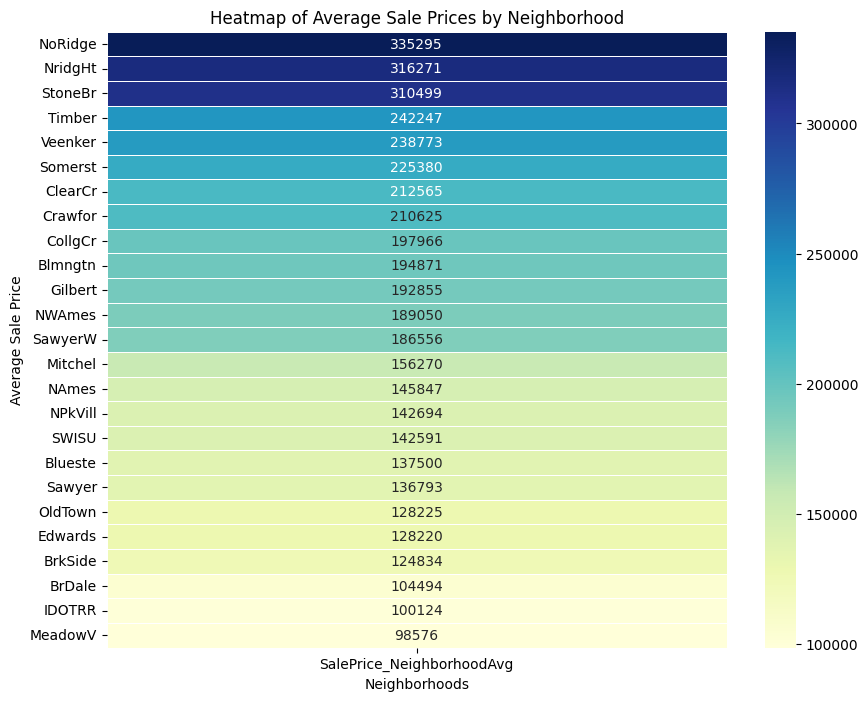

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

neighborhood_price_map = train_data.groupby('Neighborhood')['SalePrice'].mean().reset_index()

train_data = train_data.merge(neighborhood_price_map, on='Neighborhood', suffixes=('', '_NeighborhoodAvg'))

plt.figure(figsize=(10, 8))
neighborhood_heatmap = sns.heatmap(
    train_data.pivot_table(index='Neighborhood', values='SalePrice_NeighborhoodAvg', aggfunc='mean').sort_values(by='SalePrice_NeighborhoodAvg', ascending=False),
    cmap="YlGnBu", linewidths=0.5, annot=True, fmt=".0f"
)
plt.title("Heatmap of Average Sale Prices by Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Average Sale Price")

plt.show()

Analysis 83

In [52]:
medium_quality_properties = train_data[(train_data['OverallQual'] >= 5) & (train_data['OverallQual'] <= 7)]

medium_quality_upgrade_potential = medium_quality_properties.groupby(
    (medium_quality_properties['YearRemodAdd'] > medium_quality_properties['YearBuilt']).astype(int)
)['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

medium_quality_upgrade_potential.columns = ['Remodeled', 'MeanPrice', 'MedianPrice', 'StdDev', 'Count']
medium_quality_upgrade_potential['Remodeled'] = medium_quality_upgrade_potential['Remodeled'].replace({1: 'Remodeled', 0: 'Not Remodeled'})

medium_quality_upgrade_potential

,Remodeled,MeanPrice,MedianPrice,StdDev,Count
0,Not Remodeled,167293.713799,162000.0,43644.905180,587
1,Remodeled,162044.598410,153000.0,50130.782311,503


Analysis 84

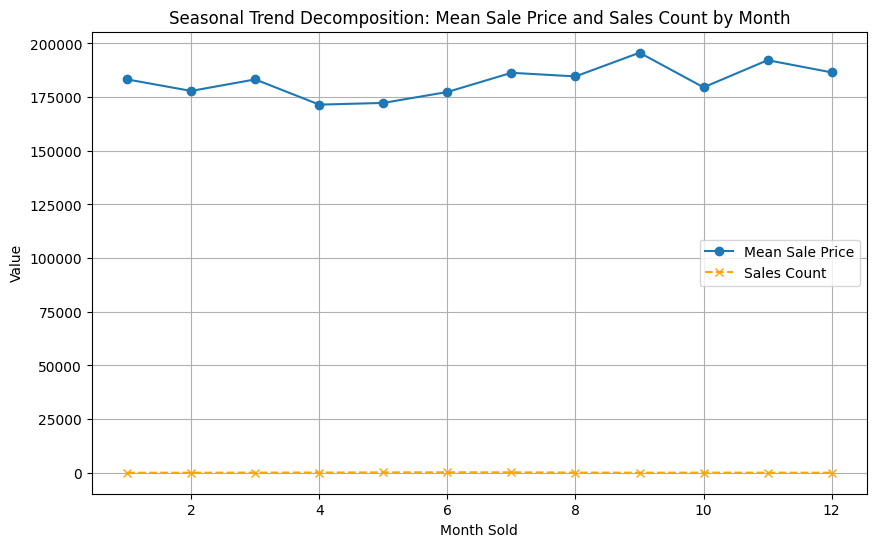

In [53]:
seasonal_salesda = train_data.groupby('MoSold')['SalePrice'].agg(['mean', 'median', 'sum', 'count']).reset_index()

seasonal_salesda.columns = ['Month', 'MeanPrice', 'MedianPrice', 'TotalSales', 'Count']

plt.figure(figsize=(10, 6))
plt.plot(seasonal_salesda['Month'], seasonal_salesda['MeanPrice'], marker='o', linestyle='-', label='Mean Sale Price')
plt.plot(seasonal_salesda['Month'], seasonal_salesda['Count'], marker='x', linestyle='--', label='Sales Count', color='orange')
plt.title("Seasonal Trend Decomposition: Mean Sale Price and Sales Count by Month")
plt.xlabel("Month Sold")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

Analysis 85

In [54]:
high_variance_neighborhoods = train_data.groupby('Neighborhood')['SalePrice'].std().reset_index()
high_variance_neighborhoods.columns = ['Neighborhood', 'StdDev']
top_high_variance_neighborhoods = high_variance_neighborhoods.sort_values(by='StdDev', ascending=False).head(5)

high_variance_neighborhood_data = train_data[train_data['Neighborhood'].isin(top_high_variance_neighborhoods['Neighborhood'])]

prediction_intervals = high_variance_neighborhood_data.groupby('Neighborhood')['SalePrice'].agg(['mean', 'std', 'count']).reset_index()
prediction_intervals['LowerBound'] = prediction_intervals['mean'] - 1.96 * prediction_intervals['std']
prediction_intervals['UpperBound'] = prediction_intervals['mean'] + 1.96 * prediction_intervals['std']


prediction_intervals

,Neighborhood,mean,std,count,LowerBound,UpperBound
0,Crawfor,210624.725490,68866.395472,51,75646.590365,345602.860616
1,NoRidge,335295.317073,121412.658640,41,97326.506138,573264.128008
2,NridgHt,316270.623377,96392.544954,77,127341.235266,505200.011487
3,StoneBr,310499.000000,112969.676640,25,89078.433785,531919.566215
4,Veenker,238772.727273,72369.317959,11,96928.864074,380616.590472


Analysis 86

In [55]:
from sklearn.cluster import DBSCAN

dbscan_features = ['GrLivArea', 'LotArea', 'TotalBsmtSF', 'GarageArea']
scaled_dbscan_data = scaler.fit_transform(train_data[dbscan_features].dropna())

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_dbscan_data)

train_data['DBSCAN_Label'] = dbscan_labels

outlier_count = (train_data['DBSCAN_Label'] == -1).sum()
total_count = len(train_data)
outlier_percentage = (outlier_count / total_count) * 100

outlier_count, outlier_percentage

(175, 11.986301369863012)

Analysis 87

In [56]:
train_data['RenovationExtent'] = train_data['YearRemodAdd'] - train_data['YearBuilt']

renovated_properties = train_data[train_data['RenovationExtent'] > 0]

renovation_impactda = renovated_properties.groupby(pd.cut(renovated_properties['RenovationExtent'], bins=[0, 5, 10, 20, np.inf], labels=['0-5', '6-10', '11-20', '20+']))['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

renovation_impactda

/tmp/ipykernel_30/827793105.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  renovation_impactda = renovated_properties.groupby(pd.cut(renovated_properties['RenovationExtent'], bins=[0, 5, 10, 20, np.inf], labels=['0-5', '6-10', '11-20', '20+']))['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()


,RenovationExtent,mean,median,std,count
0,0-5,236454.732510,212900.0,104185.868298,243
1,6-10,156400.000000,136000.0,75415.259002,32
2,11-20,154272.900000,140600.0,59462.703225,60
3,20+,146624.254848,135000.0,57341.711180,361


Analysis 88

In [57]:
lot_area_utilization = train_data.groupby('Neighborhood').agg({
    'LotArea': ['mean', 'median'],
    'SalePrice': ['mean', 'median']
}).reset_index()

lot_area_utilization.columns = ['Neighborhood', 'MeanLotArea', 'MedianLotArea', 'MeanSalePrice', 'MedianSalePrice']

lot_area_utilization['PricePerSqFt'] = lot_area_utilization['MeanSalePrice'] / lot_area_utilization['MeanLotArea']


lot_area_utilization.sort_values(by='PricePerSqFt', ascending=False).head(10)

,Neighborhood,MeanLotArea,MedianLotArea,MeanSalePrice,MedianSalePrice,PricePerSqFt
1,Blueste,1625.000000,1625.0,137500.000000,137500.0,84.615385
2,BrDale,1801.000000,1680.0,104493.750000,106000.0,58.019850
0,Blmngtn,3398.176471,3182.0,194870.882353,191000.0,57.345722
13,NPkVill,3267.444444,2308.0,142694.444444,146000.0,43.671575
10,MeadowV,2324.000000,1974.0,98576.470588,88000.0,42.416726
22,StoneBr,10671.920000,6820.0,310499.000000,278000.0,29.094952
16,NridgHt,10887.948052,11694.0,316270.623377,315000.0,29.047771
21,Somerst,7840.872093,8640.0,225379.837209,225500.0,28.744231
15,NoRidge,14218.902439,12090.0,335295.317073,301500.0,23.580956
5,CollgCr,9619.146667,9356.0,197965.773333,197200.0,20.580388


Analysis 89

In [58]:
neighborhood_dummies = pd.get_dummies(train_data['Neighborhood'], prefix='Neighborhood')
clustering_features = pd.concat([train_data[['GrLivArea', 'LotArea', 'OverallQual']], neighborhood_dummies], axis=1)

scaler = StandardScaler()
scaled_clustering_features = scaler.fit_transform(clustering_features)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_clustering_features)

train_data['Cluster'] = kmeans_labels

clusterda = train_data.groupby('Cluster')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()


clusterda

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Cluster,mean,median,std,count
0,0,224096.391720,207500.0,72279.562092,628
1,1,316270.623377,315000.0,96392.544954,77
2,2,130814.780822,131000.0,32070.677318,730
3,3,142591.360000,139500.0,32622.917679,25


Analysis 90

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 4.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=e2251e8d11081b37d4656abd438df1f31767c33454055aa345c72a1f2cbaba7a
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


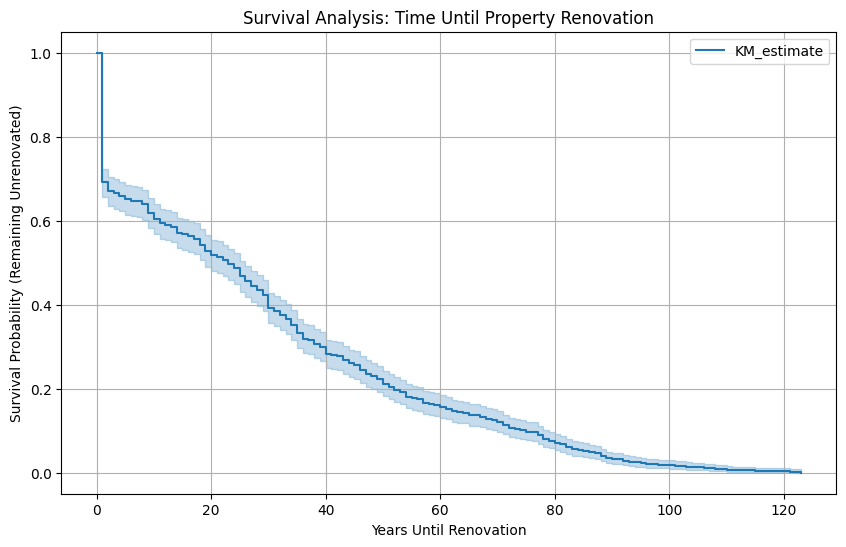

In [59]:
!pip install lifelines
from lifelines import KaplanMeierFitter

train_data['TimeUntilRenovation'] = train_data['YearRemodAdd'] - train_data['YearBuilt']
train_data['Renovated'] = (train_data['TimeUntilRenovation'] > 0).astype(int)

kmf = KaplanMeierFitter()

kmf.fit(train_data['TimeUntilRenovation'], event_observed=train_data['Renovated'])

plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title("Survival Analysis: Time Until Property Renovation")
plt.xlabel("Years Until Renovation")
plt.ylabel("Survival Probability (Remaining Unrenovated)")
plt.grid(True)
plt.show()

Analysis 91

In [60]:
yearly_price_index = train_data.groupby('YrSold')['SalePrice'].mean().reset_index()

yearly_price_index['PriceChangePct'] = yearly_price_index['SalePrice'].pct_change() * 100

yearly_price_index

,YrSold,SalePrice,PriceChangePct
0,2006,182549.458599,NaN
1,2007,186063.151976,1.924790
2,2008,177360.838816,-4.677075
3,2009,179432.103550,1.167825
4,2010,177393.674286,-1.136045


Analysis 92

In [61]:
energy_efficiencyda = train_data.groupby(['Heating', 'CentralAir'])['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

energy_efficiencyda.columns = ['HeatingType', 'CentralAir', 'MeanPrice', 'MedianPrice', 'StdDev', 'Count']

energy_efficiencyda

,HeatingType,CentralAir,MeanPrice,MedianPrice,StdDev,Count
0,Floor,N,72500.000000,72500.0,NaN,1
1,GasA,N,101665.333333,100000.0,34253.630907,69
2,GasA,Y,186101.073584,168000.0,78729.467902,1359
3,GasW,N,147156.583333,131450.0,60327.378242,12
4,GasW,Y,205583.333333,184500.0,101190.126330,6
5,Grav,N,75271.428571,79000.0,28066.570524,7
6,OthW,N,125750.000000,125750.0,5303.300859,2
7,Wall,N,92100.000000,91450.0,4509.988914,4


Analysis 93

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors

propensity_features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt', 'OverallQual']
X_propensity = train_data[propensity_features]
y_propensity = train_data['CentralAir'].apply(lambda x: 1 if x == 'Y' else 0)

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_propensity, y_propensity)
propensity_scores = log_reg.predict_proba(X_propensity)[:, 1]

train_data['PropensityScore'] = propensity_scores

treated = train_data[train_data['CentralAir'] == 'Y']
control = train_data[train_data['CentralAir'] == 'N']

nn = NearestNeighbors(n_neighbors=1).fit(control[['PropensityScore']])
distances, indices = nn.kneighbors(treated[['PropensityScore']])

matched_control_indices = indices.flatten()
matched_control = control.iloc[matched_control_indices].reset_index(drop=True)

treated_prices = treated['SalePrice'].reset_index(drop=True)
control_prices = matched_control['SalePrice'].reset_index(drop=True)

average_treatment_effect = (treated_prices - control_prices).mean()
average_treatment_effect

25001.697435897437

Analysis 94

In [63]:
corner_lotda = train_data.groupby(['LotConfig', 'Neighborhood'])['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

corner_vs_insideda = corner_lotda[corner_lotda['LotConfig'].isin(['Corner', 'Inside'])]

corner_vs_insideda.head(10)

,LotConfig,Neighborhood,mean,median,std,count
0,Corner,BrkSide,120375.000000,117500.0,26457.620487,12
1,Corner,ClearCr,225333.333333,225000.0,14502.873279,3
2,Corner,CollgCr,189083.000000,197200.0,52817.809067,22
3,Corner,Crawfor,202938.888889,217000.0,54427.151874,9
4,Corner,Edwards,144770.000000,144000.0,48054.630096,20
5,Corner,Gilbert,202871.388889,186250.0,41502.132114,18
6,Corner,IDOTRR,108812.500000,112500.0,32519.156442,8
7,Corner,Mitchel,135900.000000,134000.0,17079.812645,7
8,Corner,NAmes,155585.200000,148500.0,37192.344409,50
9,Corner,NPkVill,155000.000000,155000.0,NaN,1


Analysis 95

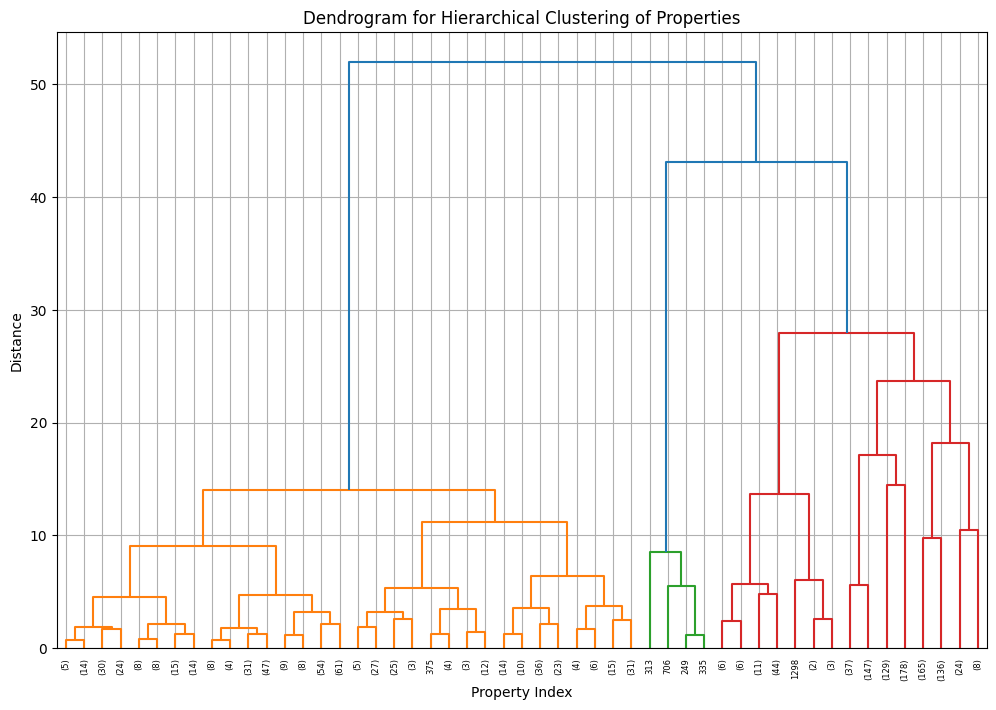

In [64]:
from scipy.cluster.hierarchy import linkage, dendrogram

hierarchical_features = train_data[['GrLivArea', 'LotArea', 'OverallQual']]

scaled_hierarchical_features = scaler.fit_transform(hierarchical_features)

linkage_matrix = linkage(scaled_hierarchical_features, method='ward')

plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, truncate_mode='level', p=5) 
plt.title("Dendrogram for Hierarchical Clustering of Properties")
plt.xlabel("Property Index")
plt.ylabel("Distance")
plt.grid(True)
plt.show()

Analysis 96

In [65]:
interaction_effectda = train_data.groupby(['KitchenQual', 'FullBath'])['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

interaction_effectda

,KitchenQual,FullBath,mean,median,std,count
0,Ex,1,227736.111111,204200.0,102293.128676,18
1,Ex,2,335256.291667,319950.0,83387.583718,72
2,Ex,3,461776.400000,511500.0,213676.980661,10
3,Fa,0,61000.000000,61000.0,NaN,1
4,Fa,1,101918.724138,101000.0,33475.846827,29
5,Fa,2,122266.666667,118000.0,40311.009662,9
6,Gd,0,279733.666667,260000.0,96918.150005,3
7,Gd,1,156702.857143,147000.0,43772.771138,119
8,Gd,2,221723.447427,214000.0,53804.376957,447
9,Gd,3,335456.941176,325000.0,106846.828701,17


Analysis 97

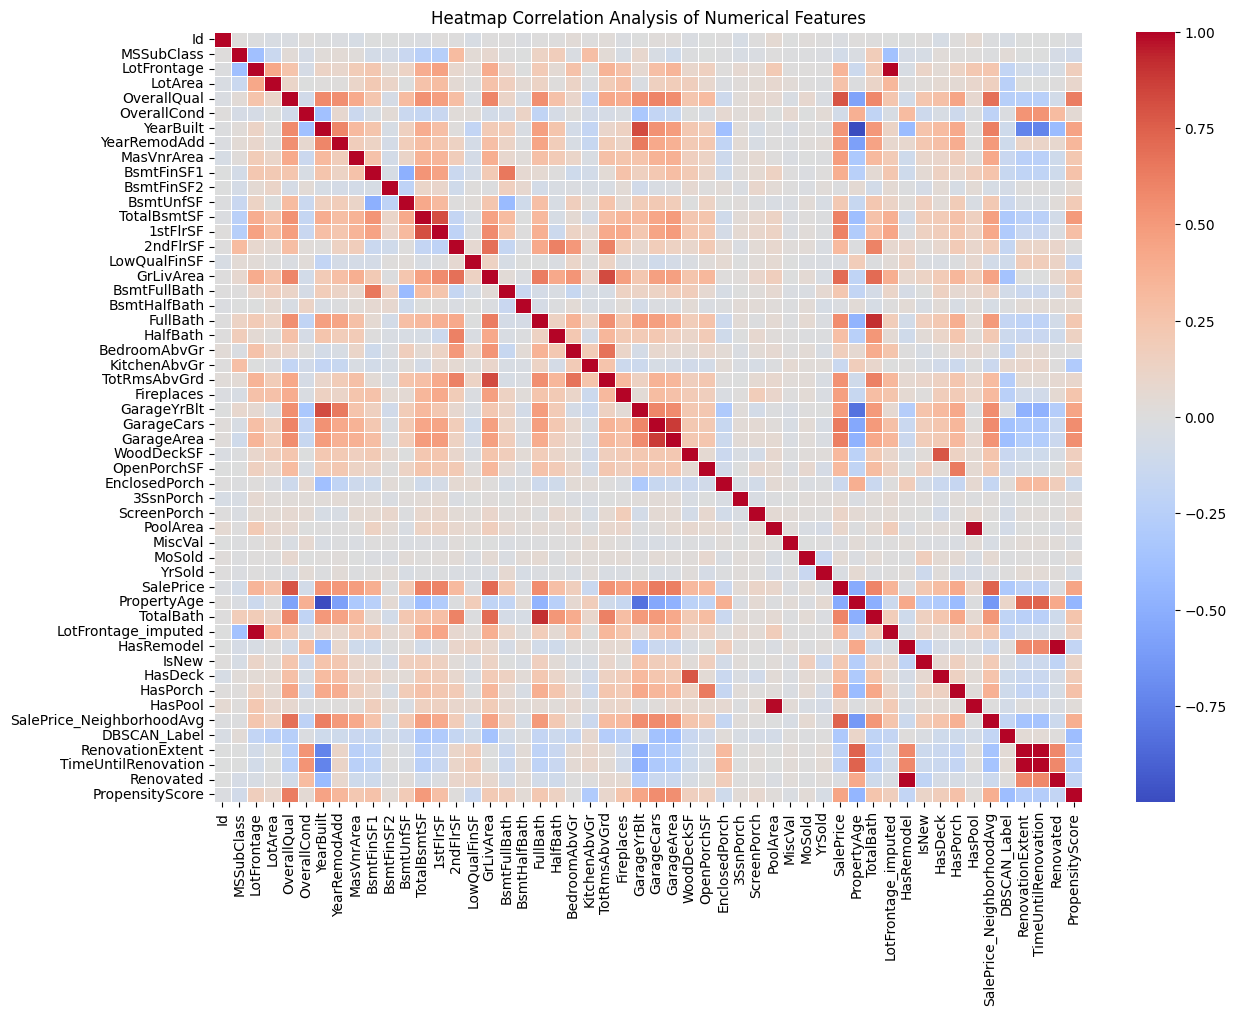

In [66]:
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = train_data[numerical_features].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Correlation Analysis of Numerical Features")
plt.show()

Analysis 98

In [67]:
from sklearn.decomposition import FactorAnalysis

factor_features = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', 'YearBuilt', 'OverallQual', 'LotArea', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd']

scaled_factor_data = scaler.fit_transform(train_data[factor_features])

factor_analysis = FactorAnalysis(n_components=3, random_state=42)
factor_components = factor_analysis.fit_transform(scaled_factor_data)

factor_loadings = pd.DataFrame(factor_analysis.components_, columns=factor_features, index=['Factor 1', 'Factor 2', 'Factor 3'])


factor_loadings

,GrLivArea,TotalBsmtSF,GarageArea,YearBuilt,OverallQual,LotArea,1stFlrSF,FullBath,TotRmsAbvGrd
Factor 1,0.929822,0.678501,0.584664,0.377427,0.700751,0.290163,0.735658,0.665890,0.764595
Factor 2,-0.294252,0.589922,0.263367,0.529882,0.229356,0.031007,0.388762,-0.038489,-0.389424
Factor 3,-0.008135,0.279434,-0.185387,-0.632571,-0.305585,0.189319,0.322315,-0.355903,-0.017079


Analysis 99

In [68]:
luxury_properties = train_data[(train_data['ExterQual'] == 'Ex') & (train_data['PoolQC'].notna())]

luxuryda = luxury_properties.groupby(['ExterQual', 'PoolQC'])['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

luxuryda

,ExterQual,PoolQC,mean,median,std,count
0,Ex,Gd,160000.0,160000.0,NaN,1


Analysis 100

In [69]:
orientationda = train_data.groupby(['LotConfig', pd.cut(train_data['LotFrontage'], bins=[0, 50, 100, 150, np.inf], labels=['Small', 'Medium', 'Large', 'Very Large'])])['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

orientationda.head(10)

/tmp/ipykernel_30/2346418695.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orientationda = train_data.groupby(['LotConfig', pd.cut(train_data['LotFrontage'], bins=[0, 50, 100, 150, np.inf], labels=['Small', 'Medium', 'Large', 'Very Large'])])['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()


,LotConfig,LotFrontage,mean,median,std,count
0,Corner,Small,139081.250000,138000.0,31415.881732,16
1,Corner,Medium,170016.729167,150875.0,69823.591334,144
2,Corner,Large,230201.027778,202570.5,119710.368681,36
3,Corner,Very Large,290300.000000,235000.0,266606.826619,5
4,CulDSac,Small,238825.333333,219950.0,101236.584828,24
5,CulDSac,Medium,274931.947368,241500.0,96368.171059,19
6,CulDSac,Large,625000.000000,625000.0,NaN,1
7,CulDSac,Very Large,274725.000000,274725.0,NaN,1
8,FR2,Small,172857.142857,162000.0,30197.563762,7
9,FR2,Medium,179970.192308,174250.0,77524.853401,26


Analysis 101

In [70]:
train_data['Renovated'] = (train_data['YearRemodAdd'] > train_data['YearBuilt']).astype(int)
train_data['PropertyAge'] = train_data['YrSold'] - train_data['YearBuilt']

train_data['AgeGroup'] = pd.cut(train_data['PropertyAge'], bins=[0, 20, 40, 60, np.inf], labels=['0-20', '21-40', '41-60', '61+'])

renovation_impact_age_group = train_data.groupby(['AgeGroup', 'Renovated'])['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

renovation_impact_age_group

/tmp/ipykernel_30/586576780.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  renovation_impact_age_group = train_data.groupby(['AgeGroup', 'Renovated'])['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()


,AgeGroup,Renovated,mean,median,std,count
0,0-20,0,219454.024476,205975.0,67502.591389,286
1,0-20,1,254925.649533,224500.0,99530.381335,214
2,21-40,0,151053.467890,145000.0,42082.122956,218
3,21-40,1,190190.000000,178000.0,64598.818502,55
4,41-60,0,137410.233503,135500.0,33444.570652,197
5,41-60,1,153945.410448,145000.0,42777.409586,134
6,61+,0,NaN,NaN,NaN,0
7,61+,1,132955.671233,120750.0,55814.476479,292


Analysis 102

In [71]:
market_saturationda = train_data.groupby('YrSold').agg({
    'SalePrice': ['mean', 'count']
}).reset_index()

market_saturationda.columns = ['YearSold', 'MeanSalePrice', 'TransactionVolume']

market_saturationda

,YearSold,MeanSalePrice,TransactionVolume
0,2006,182549.458599,314
1,2007,186063.151976,329
2,2008,177360.838816,304
3,2009,179432.103550,338
4,2010,177393.674286,175


Analysis 103

In [72]:
train_data['DecadeBuilt'] = (train_data['YearBuilt'] // 10) * 10

decadeda = train_data.groupby('DecadeBuilt')['SalePrice'].agg(['mean', 'median', 'std', 'count']).reset_index()

decadeda

,DecadeBuilt,mean,median,std,count
0,1870,108000.000000,108000.0,19798.989873,2
1,1880,170425.571429,124000.0,78388.137563,7
2,1890,216316.666667,142200.0,151211.843672,6
3,1900,129828.400000,127000.0,41345.950724,15
4,1910,131511.482759,128750.0,39344.221975,58
5,1920,123268.350515,115000.0,44179.012945,97
6,1930,144415.833333,126500.0,71533.766293,54
7,1940,126887.481013,122900.0,43346.752243,79
8,1950,140935.670659,136000.0,39321.976693,167
9,1960,153852.640000,146000.0,37612.696342,175


# **Predictive Modelling**

Imports

In [73]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from category_encoders import TargetEncoder
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.optimize import minimize
from scipy.stats import randint, uniform

train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

Different Advanced Regression Models

In [74]:
outlier_idx = train_df[(train_df['GrLivArea'] > 4000) | (train_df['LotArea'] > 100000)].index
train_df = train_df.drop(outlier_idx)

train_df['LogSalePrice'] = np.log1p(train_df['SalePrice'])

train_df['GrLivArea_OverallQual'] = train_df['GrLivArea'] * train_df['OverallQual']
train_df['TotalBath'] = train_df['FullBath'] + (0.5 * train_df['HalfBath'])
train_df['TotRmsAbvGrd_BedroomAbvGr'] = train_df['TotRmsAbvGrd'] + train_df['BedroomAbvGr']
train_df['Years_Since_Remodel'] = train_df['YrSold'] - train_df['YearRemodAdd']
train_df['Years_Since_Built'] = train_df['YrSold'] - train_df['YearBuilt']
train_df['LotArea_Neighborhood'] = train_df['LotArea'] / train_df.groupby('Neighborhood')['LotArea'].transform('mean')
train_df['IsSummerSale'] = train_df['MoSold'].apply(lambda x: 1 if x in [6, 7] else 0)
train_df['PremiumCluster'] = train_df.apply(lambda x: 1 if (x['Exterior1st'] == 'Stone' and x['RoofStyle'] == 'Hip') else 0, axis=1)
train_df['OverallQual_Basement'] = train_df['OverallQual'] * train_df['TotalBsmtSF']
train_df['GrLivArea_ExterQual'] = train_df['GrLivArea'] * train_df['ExterQual']
train_df['GarageQuality_Size'] = train_df['GarageCars'] * train_df['GarageArea']

X = train_df.drop(['SalePrice', 'LogSalePrice', 'Id'], axis=1)
y = train_df['LogSalePrice']

numeric_features = ['GrLivArea', 'LotArea', 'TotalBsmtSF', '1stFlrSF', 'LotArea_Neighborhood', 'Years_Since_Remodel', 'Years_Since_Built']
categorical_features = ['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 
                        'ExterQual', 'GarageFinish', 'SaleCondition', 'Functional', 'HeatingQC']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log_transform', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

models = {
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'RandomForest': RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)
}

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

rmse_results = {}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    
    y_val_pred = pipeline.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    rmse_results[model_name] = rmse
    print(f"{model_name} Validation RMSE: {rmse}")

rmse_results

ElasticNet Validation RMSE: 0.40038153276304617
RandomForest Validation RMSE: 0.15439110354958302
GradientBoosting Validation RMSE: 0.15895244991573512
XGBoost Validation RMSE: 0.15995567573560632


{'ElasticNet': 0.40038153276304617,
 'RandomForest': 0.15439110354958302,
 'GradientBoosting': 0.15895244991573512,
 'XGBoost': 0.15995567573560632}

Enhanced Predictive Model(Regression)

In [75]:
class FeatureEngineeringTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X = X.copy()
        X['GrLivArea_OverallQual'] = X['GrLivArea'] * X['OverallQual']
        X['TotalBath'] = X['FullBath'] + (0.5 * X['HalfBath'])
        X['TotRmsAbvGrd_BedroomAbvGr'] = X['TotRmsAbvGrd'] + X['BedroomAbvGr']
        X['Years_Since_Remodel'] = X['YrSold'] - X['YearRemodAdd']
        X['Years_Since_Built'] = X['YrSold'] - X['YearBuilt']
        X['LotArea_Neighborhood'] = X['LotArea'] / X.groupby('Neighborhood')['LotArea'].transform('mean')
        X['IsSummerSale'] = X['MoSold'].apply(lambda x: 1 if x in [6, 7] else 0)
        X['PremiumCluster'] = X.apply(lambda x: 1 if (x['Exterior1st'] == 'Stone' and x['RoofStyle'] == 'Hip') else 0, axis=1)
        X['OverallQual_Basement'] = X['OverallQual'] * X['TotalBsmtSF']
        X['GrLivArea_ExterQual'] = X['GrLivArea'] * X['ExterQual']
        X['GarageQuality_Size'] = X['GarageCars'] * X['GarageArea']
        return X

outlier_idx = train_df[(train_df['GrLivArea'] > 4000) | (train_df['LotArea'] > 100000)].index
train_df = train_df.drop(outlier_idx)

train_df['LogSalePrice'] = np.log1p(train_df['SalePrice'])
X = train_df.drop(['SalePrice', 'LogSalePrice', 'Id'], axis=1)
y = train_df['LogSalePrice']

numeric_features = ['GrLivArea', 'LotArea', 'TotalBsmtSF', '1stFlrSF']
categorical_features = ['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 
                        'ExterQual', 'GarageFinish', 'SaleCondition', 'Functional', 'HeatingQC']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log_transform', FunctionTransformer(np.log1p, validate=True)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = Pipeline(steps=[
    ('feature_engineering', FeatureEngineeringTransformer()),
    ('transform_features', ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]))
])

random_forest = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
gradient_boosting = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=3, random_state=42)

rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', random_forest)
])

gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', gradient_boosting)
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

rf_pipeline.fit(X_train, y_train)
gb_pipeline.fit(X_train, y_train)

rf_pred = rf_pipeline.predict(X_val)
gb_pred = gb_pipeline.predict(X_val)

def rmse_with_weights(weights):
    blended_pred = weights[0] * rf_pred + weights[1] * gb_pred
    return np.sqrt(mean_squared_error(y_val, blended_pred))

initial_weights = [0.5, 0.5]
constraints = {'type': 'eq', 'fun': lambda w: 1 - sum(w)}
bounds = [(0, 1), (0, 1)]

optimal = minimize(rmse_with_weights, initial_weights, bounds=bounds, constraints=constraints)
optimal_weights = optimal.x
print(f"Optimal Weights: RandomForest={optimal_weights[0]:.4f}, GradientBoosting={optimal_weights[1]:.4f}")

blended_pred_optimal = optimal_weights[0] * rf_pred + optimal_weights[1] * gb_pred
rmse_optimal = np.sqrt(mean_squared_error(y_val, blended_pred_optimal))
print(f"Optimized Blended Model Validation RMSE: {rmse_optimal}")

rf_test_pred = rf_pipeline.predict(test_df.drop(['Id'], axis=1))
gb_test_pred = gb_pipeline.predict(test_df.drop(['Id'], axis=1))
final_predictions = (optimal_weights[0] * rf_test_pred) + (optimal_weights[1] * gb_test_pred)

submission = pd.DataFrame({
    'Id': test_df['Id'],
    'SalePrice': np.expm1(final_predictions)
})
submission_path = "submission.csv"
submission.to_csv(submission_path, index=False)

rmse_optimal, submission_path

Optimal Weights: RandomForest=0.3163, GradientBoosting=0.6837
Optimized Blended Model Validation RMSE: 0.15293240449407347


(0.15293240449407347, 'submission.csv')